<a href="https://colab.research.google.com/github/junxnone/examples/blob/master/opencv/he_ahe_clahe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/junxnone/tech-io/raw/master/lena.png

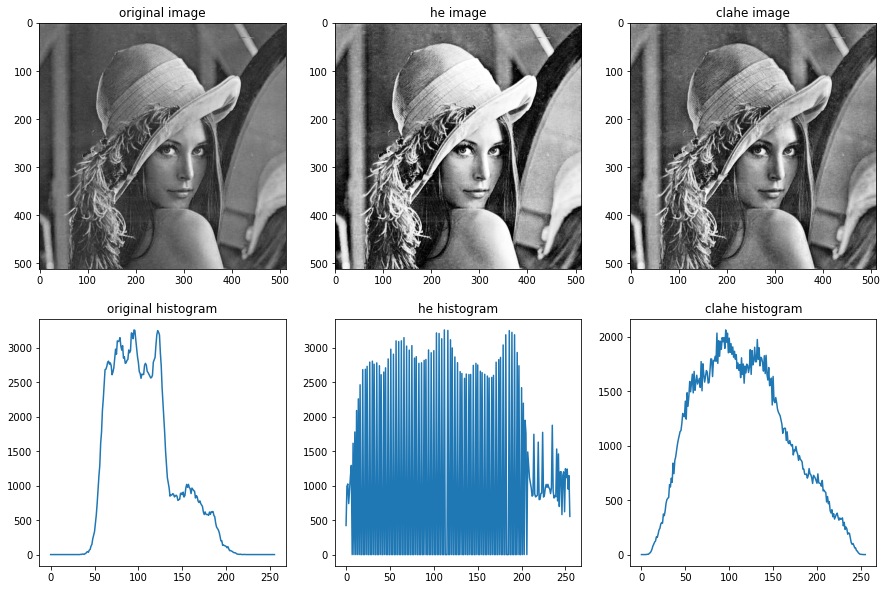

In [37]:
img = cv2.imread('lena.png')
img = img[:,:,0]
o_hist = cv2.calcHist([img],[0],None,[256],[0,256])
heimg = cv2.equalizeHist(img)
he_hist = cv2.calcHist([heimg],[0],None,[256],[0,256])
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
climg = clahe.apply(img)
cl_hist = cv2.calcHist([climg],[0],None,[256],[0,256])

plt.figure(figsize=(15,10))
plt.subplot(231)
plt.title('original image')
plt.imshow(img, cmap='gray')
plt.subplot(232)
plt.title('he image')
plt.imshow(heimg, cmap='gray')
plt.subplot(233)
plt.title('clahe image')
plt.imshow(climg, cmap='gray')

plt.subplot(234)
plt.title('original histogram')
plt.plot(o_hist)


plt.subplot(235)
plt.title('he histogram')
plt.plot(he_hist)

plt.subplot(236)
plt.title('clahe histogram')
plt.plot(cl_hist)

## numpy implement HE

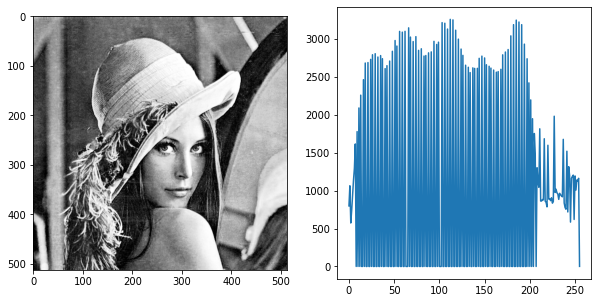

In [35]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_norm = 255 * cdf / cdf[-1]
npeq_img = np.interp(img.flatten(), bins[:-1], cdf_norm).reshape(img.shape).astype(np.uint8)
npeq_hist = cv2.calcHist([npeq_img], [0], None, [256], [0, 256])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(npeq_img, cmap='gray')
plt.subplot(122)
plt.plot(npeq_hist)